In [1]:
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams["figure.titleweight"] = 'bold'
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

ALMOST_BLACK = '0.125'
plt.rcParams['text.color'] = ALMOST_BLACK
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['xtick.major.pad'] = '8'
plt.rcParams['axes.edgecolor']  = ALMOST_BLACK
plt.rcParams['axes.labelcolor'] = ALMOST_BLACK
plt.rcParams['lines.color']     = ALMOST_BLACK
plt.rcParams['xtick.color']     = ALMOST_BLACK
plt.rcParams['ytick.color']     = ALMOST_BLACK
plt.rcParams['text.color']      = ALMOST_BLACK
from math import ceil,floor


In [3]:
import coha

In [2]:
from representations.sequentialembedding import SequentialEmbedding

"""
Example showing how to load a series of historical embeddings and compute similarities over time.
Warning that loading all the embeddings into main memory can take a lot of RAM
"""

fiction_embeddings = SequentialEmbedding.load("embeddings/eng-fiction-all_sgns", range(1950, 2000, 10))
time_sims = fiction_embeddings.get_time_sims("science", "race")   
print("Similarity between genetics and race drastically increases from 1950s to the 1990s:")
for year, sim in time_sims.iteritems():
    print("{year:d}, cosine similarity={sim:0.5f}".format(year=year,sim=sim))

Similarity between genetics and race drastically increases from 1950s to the 1990s:
1950, cosine similarity=0.23197
1960, cosine similarity=0.20108
1970, cosine similarity=0.13455
1980, cosine similarity=0.13242
1990, cosine similarity=0.15368


In [8]:
from representations.sequentialembedding import SequentialEmbedding
from viz.scripts import closest_over_time_chain

ImportError: No module named viz.scripts

In [21]:
import requests
url = "https://books.google.com/ngrams/json"

query_params = {
        "content": "eugenics",
        "year_start": 1800,
        "year_end": 2019,
        "corpus": 26,
        "smoothing": 10,
        "case_insensitive": True
    }
response = requests.get(url=url, params=query_params)
out = ast.literal_eval(json.dumps(response.json()))[0]

In [22]:
len([out['timeseries'][i] for i in range(len(out['timeseries'])) if i%10==0])

22

In [8]:
out

{'ngram': 'eugenics',
 'parent': '',
 'timeseries': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.097362958707587e-09,
  3.097362958707587e-09,
  3.097362958707587e-09,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.316333020905101e-09,
  7.316333020905101e-09,
  7.316333020905101e-09,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.214879887447069e-10,
  8.214879887447069e-10,
  8.214879887447069e-10,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.646824489483985e-10,
  5.646824489483985e-10,
  5.646824489483985e-10,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.4113044241242583e-09,
  3.4113044241242583e-09,
  3.4113044241242583e-09,
  1.3234402018724722e-08,
  1.3234402018724722e-08,
  1.9269002393684787e-08,
  6.034600374960064e-09,

In [57]:
len(out['timeseries'])

220

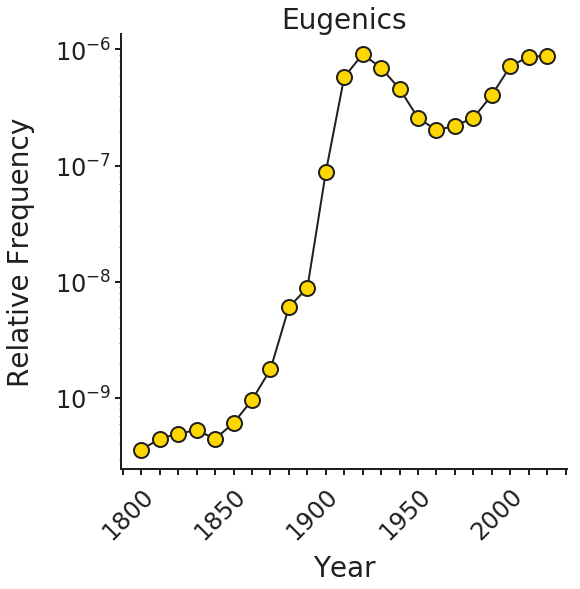

In [37]:
def plotNgramFrequency(word,year_0,year_n):
    
    url = "https://books.google.com/ngrams/json"

    query_params = {
        "content": word,
        "year_start": year_0,
        "year_end": year_n,
        "corpus": 26,
        "smoothing": 10,
        "case_insensitive": True
    }
    response = requests.get(url=url, params=query_params)


    fig, ax = plt.subplots(figsize=(8,8))

    a = range(year_0,year_n+1,10)
    out = ast.literal_eval(json.dumps(response.json()))[0]#['timeseries']
    b = [out['timeseries'][i] for i in range(len(out['timeseries'])) if i%10==0]
    

    plt.plot(a, b, mfc='gold', mec='0.125',marker='o', ms=15, ls='-', color='0.125', lw=2,mew=2)
    #plt.scatter(a, b,c='b',s=500,alpha=.99)
    thicc = 2
    ax.set_ylabel("Relative Frequency",fontsize=28,labelpad = 20)
    ax.set_xlabel("Year",fontsize=28,labelpad = 10)
    ax.set_xticks(range(year_0,year_n+1,50))
    ax.set_xticklabels(range(year_0,year_n+1,50),rotation=45,rotation_mode='anchor',ha='right')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(MultipleLocator(10))  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=True, left=True)
#    y_min = floor(min(time_sims.values()*10))/10
 #   y_max = ceil(max(time_sims.values())*10)/10 + 0.01
 #   ax.set_ylim((y_min,y_max))
  #  ax.set_yticks(map(lambda x: x/100.0, range(int(y_min*100),int(y_max*100),10)))

    ax.xaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.yaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.xaxis.set_tick_params(width=thicc,which='minor',length=thicc*3)
    plt.axhline(0,zorder=1,color="0.125",linestyle='dotted')
    plt.yticks(fontsize=24)

    plt.xticks(fontsize=24)
    plt.yscale('log')

    #plt.yticks()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thicc)
    plt.title(str(word).title(),fontsize=28)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)  
    return plt.show()

plotNgramFrequency('eugenics',1800,2020)

In [26]:
for key in response.json():
    print(key,":", response.json()[key]) 


(u'ngrams', ':', [{u'tokens': [{u'text': u'eugenics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 981634, u'id': u'4aec9d4dc36ac14289b37e4dd0e708dd', u'relTotalMatchCount': 4.914274583938805e-07}, {u'tokens': [{u'text': u'Eugenics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 762671, u'id': u'a10205f7a1316d1daafe0971a834bdb6', u'relTotalMatchCount': 3.8180978971869277e-07}, {u'tokens': [{u'text': u'EUGENICS', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 45997, u'id': u'5c923ddd6a9dedbd8fe97214e9267f0f', u'relTotalMatchCount': 2.3027104606954652e-08}, {u'tokens': [{u'text': u'EUGENICs', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 1559, u'id': u'2c96391fddf14519dffe775c3e1a989b', u'relTotalMatchCount': 7.804695106690068e-10}, {u'tokens': [{u'text': u'EUGENics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 1277, u'id': u'3b82abf98f067aff6bf790bbe021e73b', u'relTotalMatchCount': 6.392941405544077e-10}, {u'to

In [29]:
response.json()[u'ngrams']

[{u'absTotalMatchCount': 981634,
  u'id': u'4aec9d4dc36ac14289b37e4dd0e708dd',
  u'relTotalMatchCount': 4.914274583938805e-07,
  u'tokens': [{u'kind': u'TERM', u'text': u'eugenics', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 762671,
  u'id': u'a10205f7a1316d1daafe0971a834bdb6',
  u'relTotalMatchCount': 3.8180978971869277e-07,
  u'tokens': [{u'kind': u'TERM', u'text': u'Eugenics', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 45997,
  u'id': u'5c923ddd6a9dedbd8fe97214e9267f0f',
  u'relTotalMatchCount': 2.3027104606954652e-08,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENICS', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 1559,
  u'id': u'2c96391fddf14519dffe775c3e1a989b',
  u'relTotalMatchCount': 7.804695106690068e-10,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENICs', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 1277,
  u'id': u'3b82abf98f067aff6bf790bbe021e73b',
  u'relTotalMatchCount': 6.392941405544077e-10,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENics', u'type': 

In [28]:
response.json().keys()

[u'ngrams', u'queryTokens']

In [5]:
embeddings_all = SequentialEmbedding.load("embeddings/all-eng", range(1800, 2000, 10))
embeddings_coha = SequentialEmbedding.load("embeddings/coha-word", range(1800, 2000, 10))


/opt/anaconda3/envs/histwords-env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


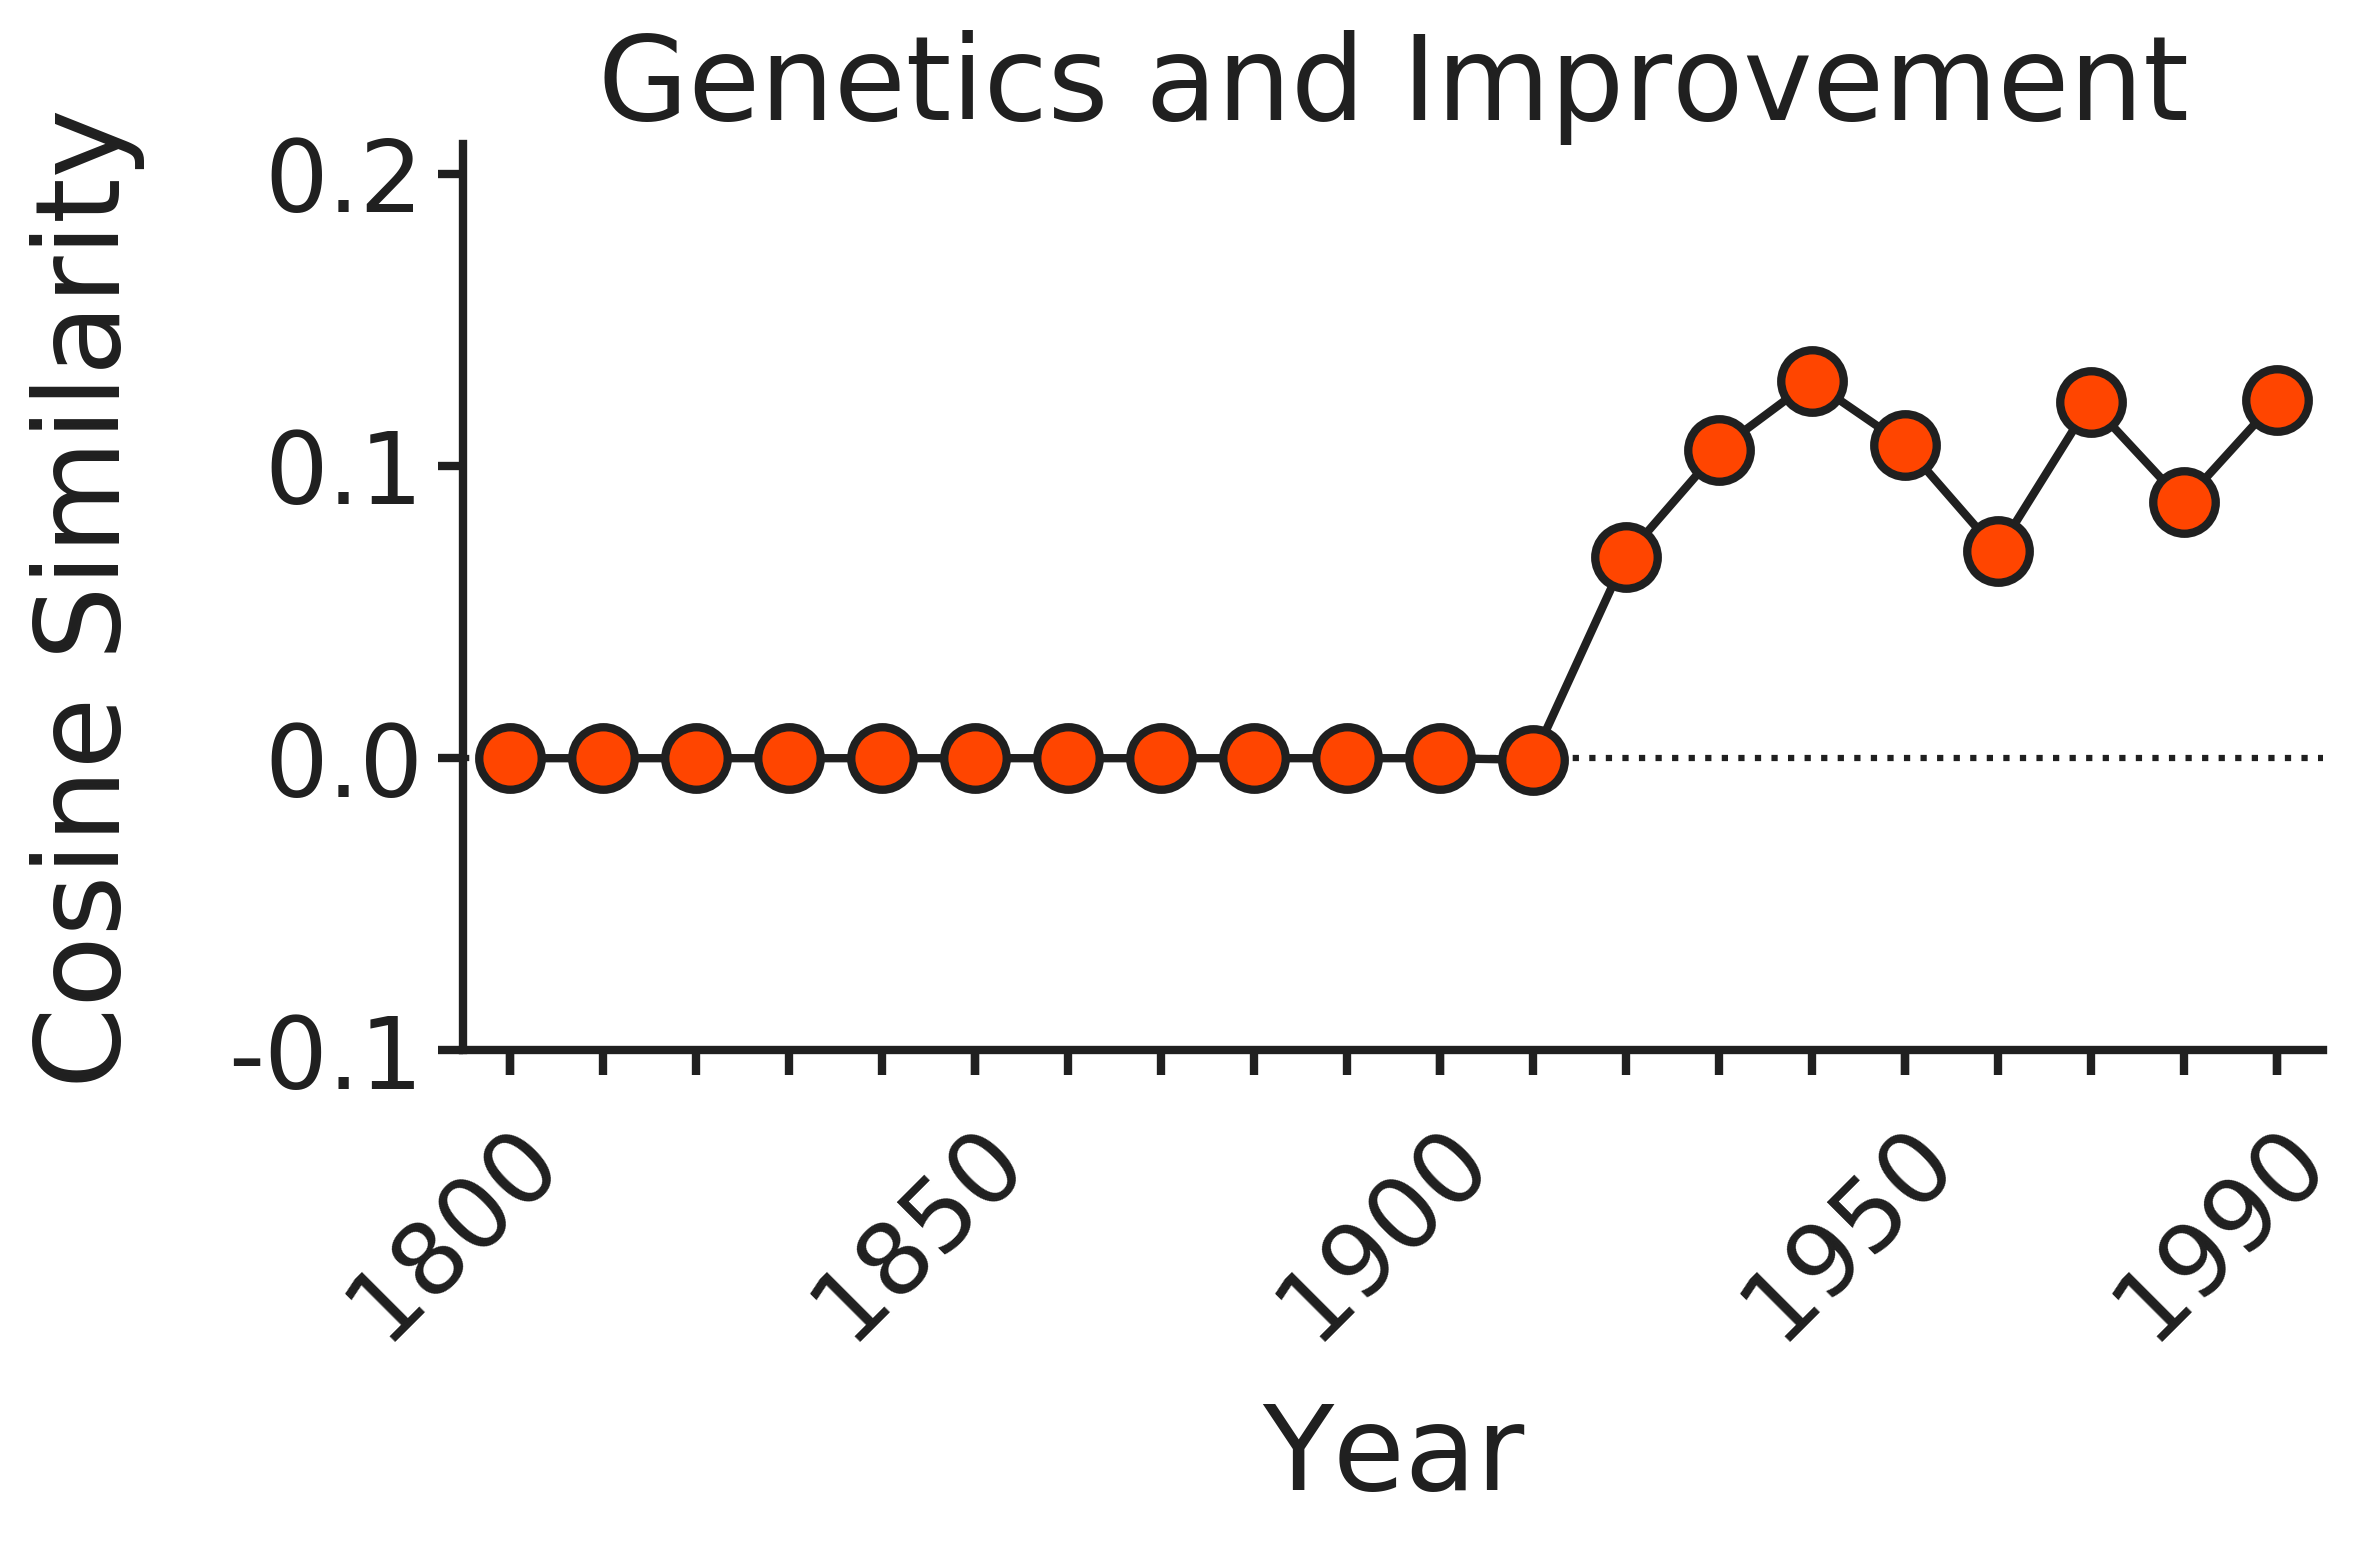

In [6]:
def plotDiachronicSimilarity(word1,word2,embeddings):
    time_sims = embeddings.get_time_sims(word1, word2) 


    fig, ax = plt.subplots(figsize=(8,4))

    a = list(time_sims.keys())
    b = list(time_sims.values())

    plt.plot(a, b, mfc='orangered', mec='0.125',marker='o', ms=15, ls='-', color='0.125', lw=2,mew=2)
    #plt.scatter(a, b,c='b',s=500,alpha=.99)
    thicc = 2
    ax.set_ylabel("Cosine Similarity",fontsize=28,labelpad = 20)
    ax.set_xlabel("Year",fontsize=28,labelpad = 10)
    ax.set_xticks([1800,1850,1900,1950,1990])
    ax.set_xticklabels([1800,1850,1900,1950,1990],rotation=45,rotation_mode='anchor',ha='right')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(MultipleLocator(10))  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=True, left=True)
    ax.set_xlim((1795,1995))
    y_min = floor(min(time_sims.values()*10))/10
    y_max = ceil(max(time_sims.values())*10)/10 + 0.01
    ax.set_ylim((y_min,y_max))
    ax.set_yticks(map(lambda x: x/100.0, range(int(y_min*100),int(y_max*100),10)))

    ax.xaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.yaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.xaxis.set_tick_params(width=thicc,which='minor',length=thicc*3)
    plt.axhline(0,zorder=1,color="0.125",linestyle='dotted')
    plt.yticks(fontsize=24)

    plt.xticks(fontsize=24)

    #plt.yticks()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thicc)
    plt.title(str(word1).title() + " and " + str(word2).title(),fontsize=28)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)  
    return plt.show()

plotDiachronicSimilarity('genetics','improvement',embeddings_all)

In [38]:
?plt.annotate()

Signature: plt.annotate(*args, **kwargs)
Docstring:
Annotate the point ``xy`` with text ``s``.

Additional kwargs are passed to `~matplotlib.text.Text`.

Parameters
----------

s : str
    The text of the annotation

xy : iterable
    Length 2 sequence specifying the *(x,y)* point to annotate

xytext : iterable, optional
    Length 2 sequence specifying the *(x,y)* to place the text
    at.  If None, defaults to ``xy``.

xycoords : str, Artist, Transform, callable or tuple, optional

    The coordinate system that ``xy`` is given in.

    For a `str` the allowed values are:

    =================   ===============================================
    Property            Description
    =================   ===============================================
    'figure points'     points from the lower left of the figure
    'figure pixels'     pixels from the lower left of the figure
    'figure fraction'   fraction of figure from lower left
    'axes points'       points from lower left co

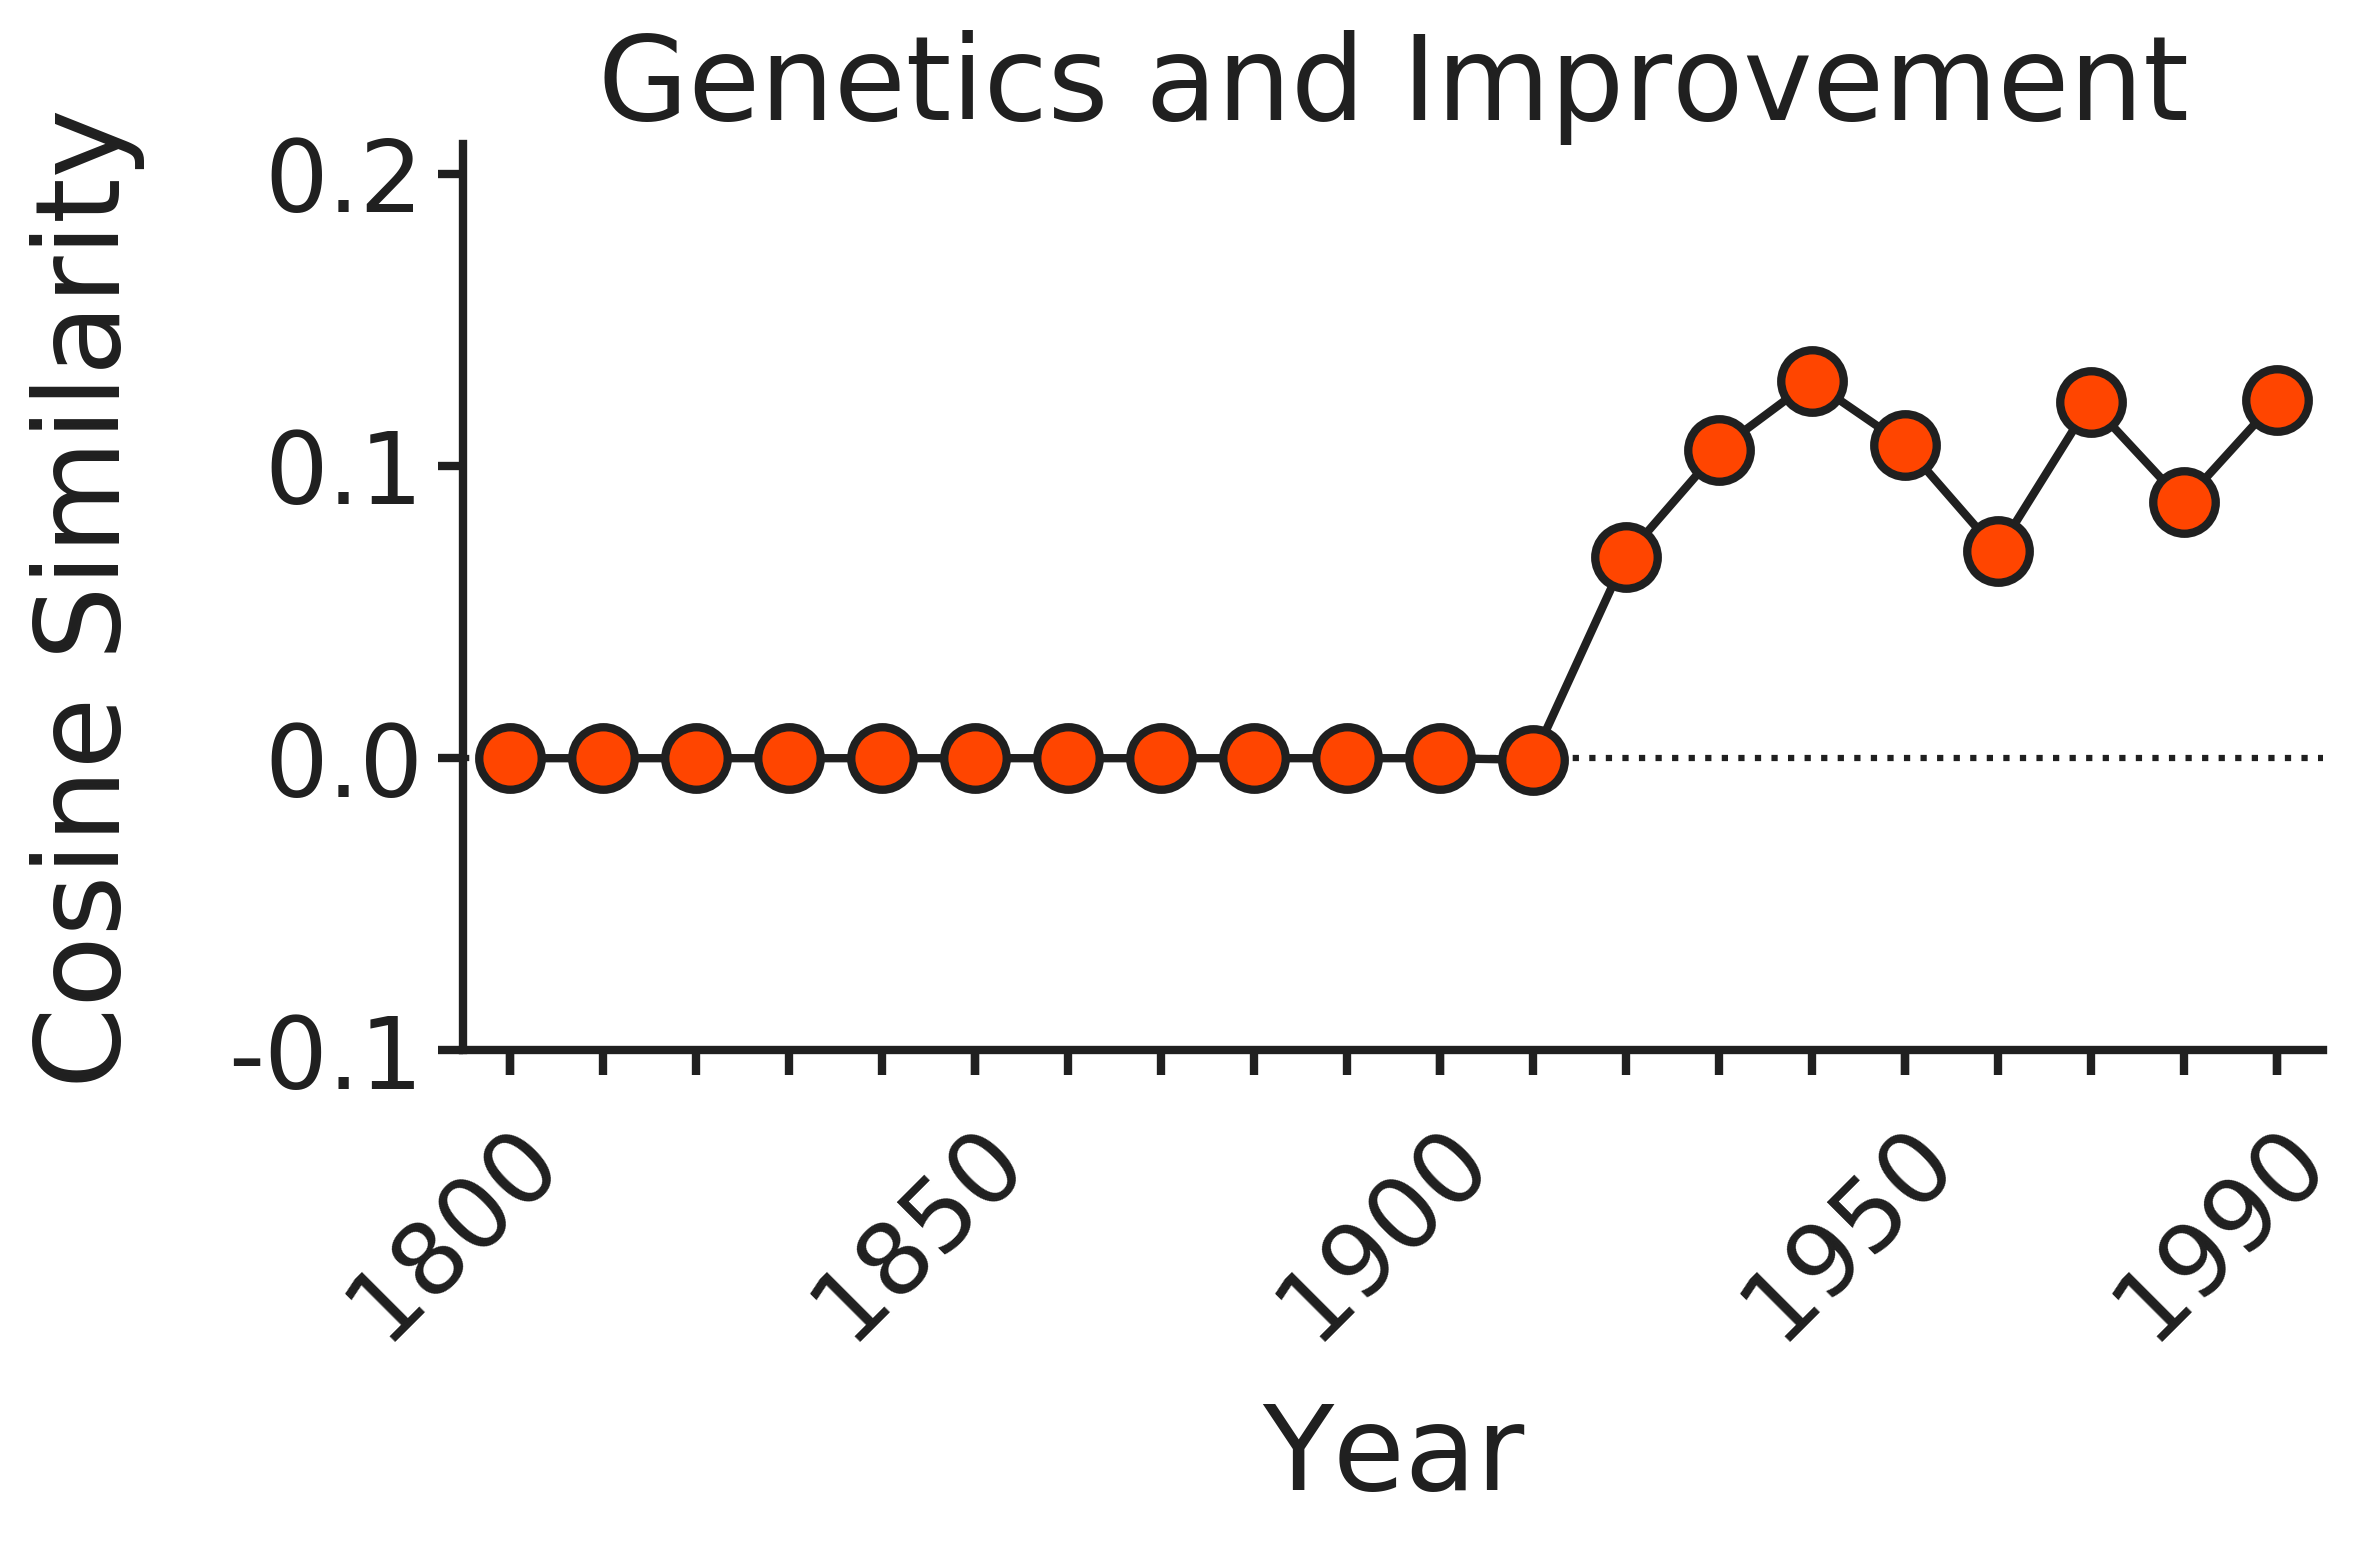

In [7]:
plotDiachronicSimilarity('genetics','improvement',embeddings_coha)

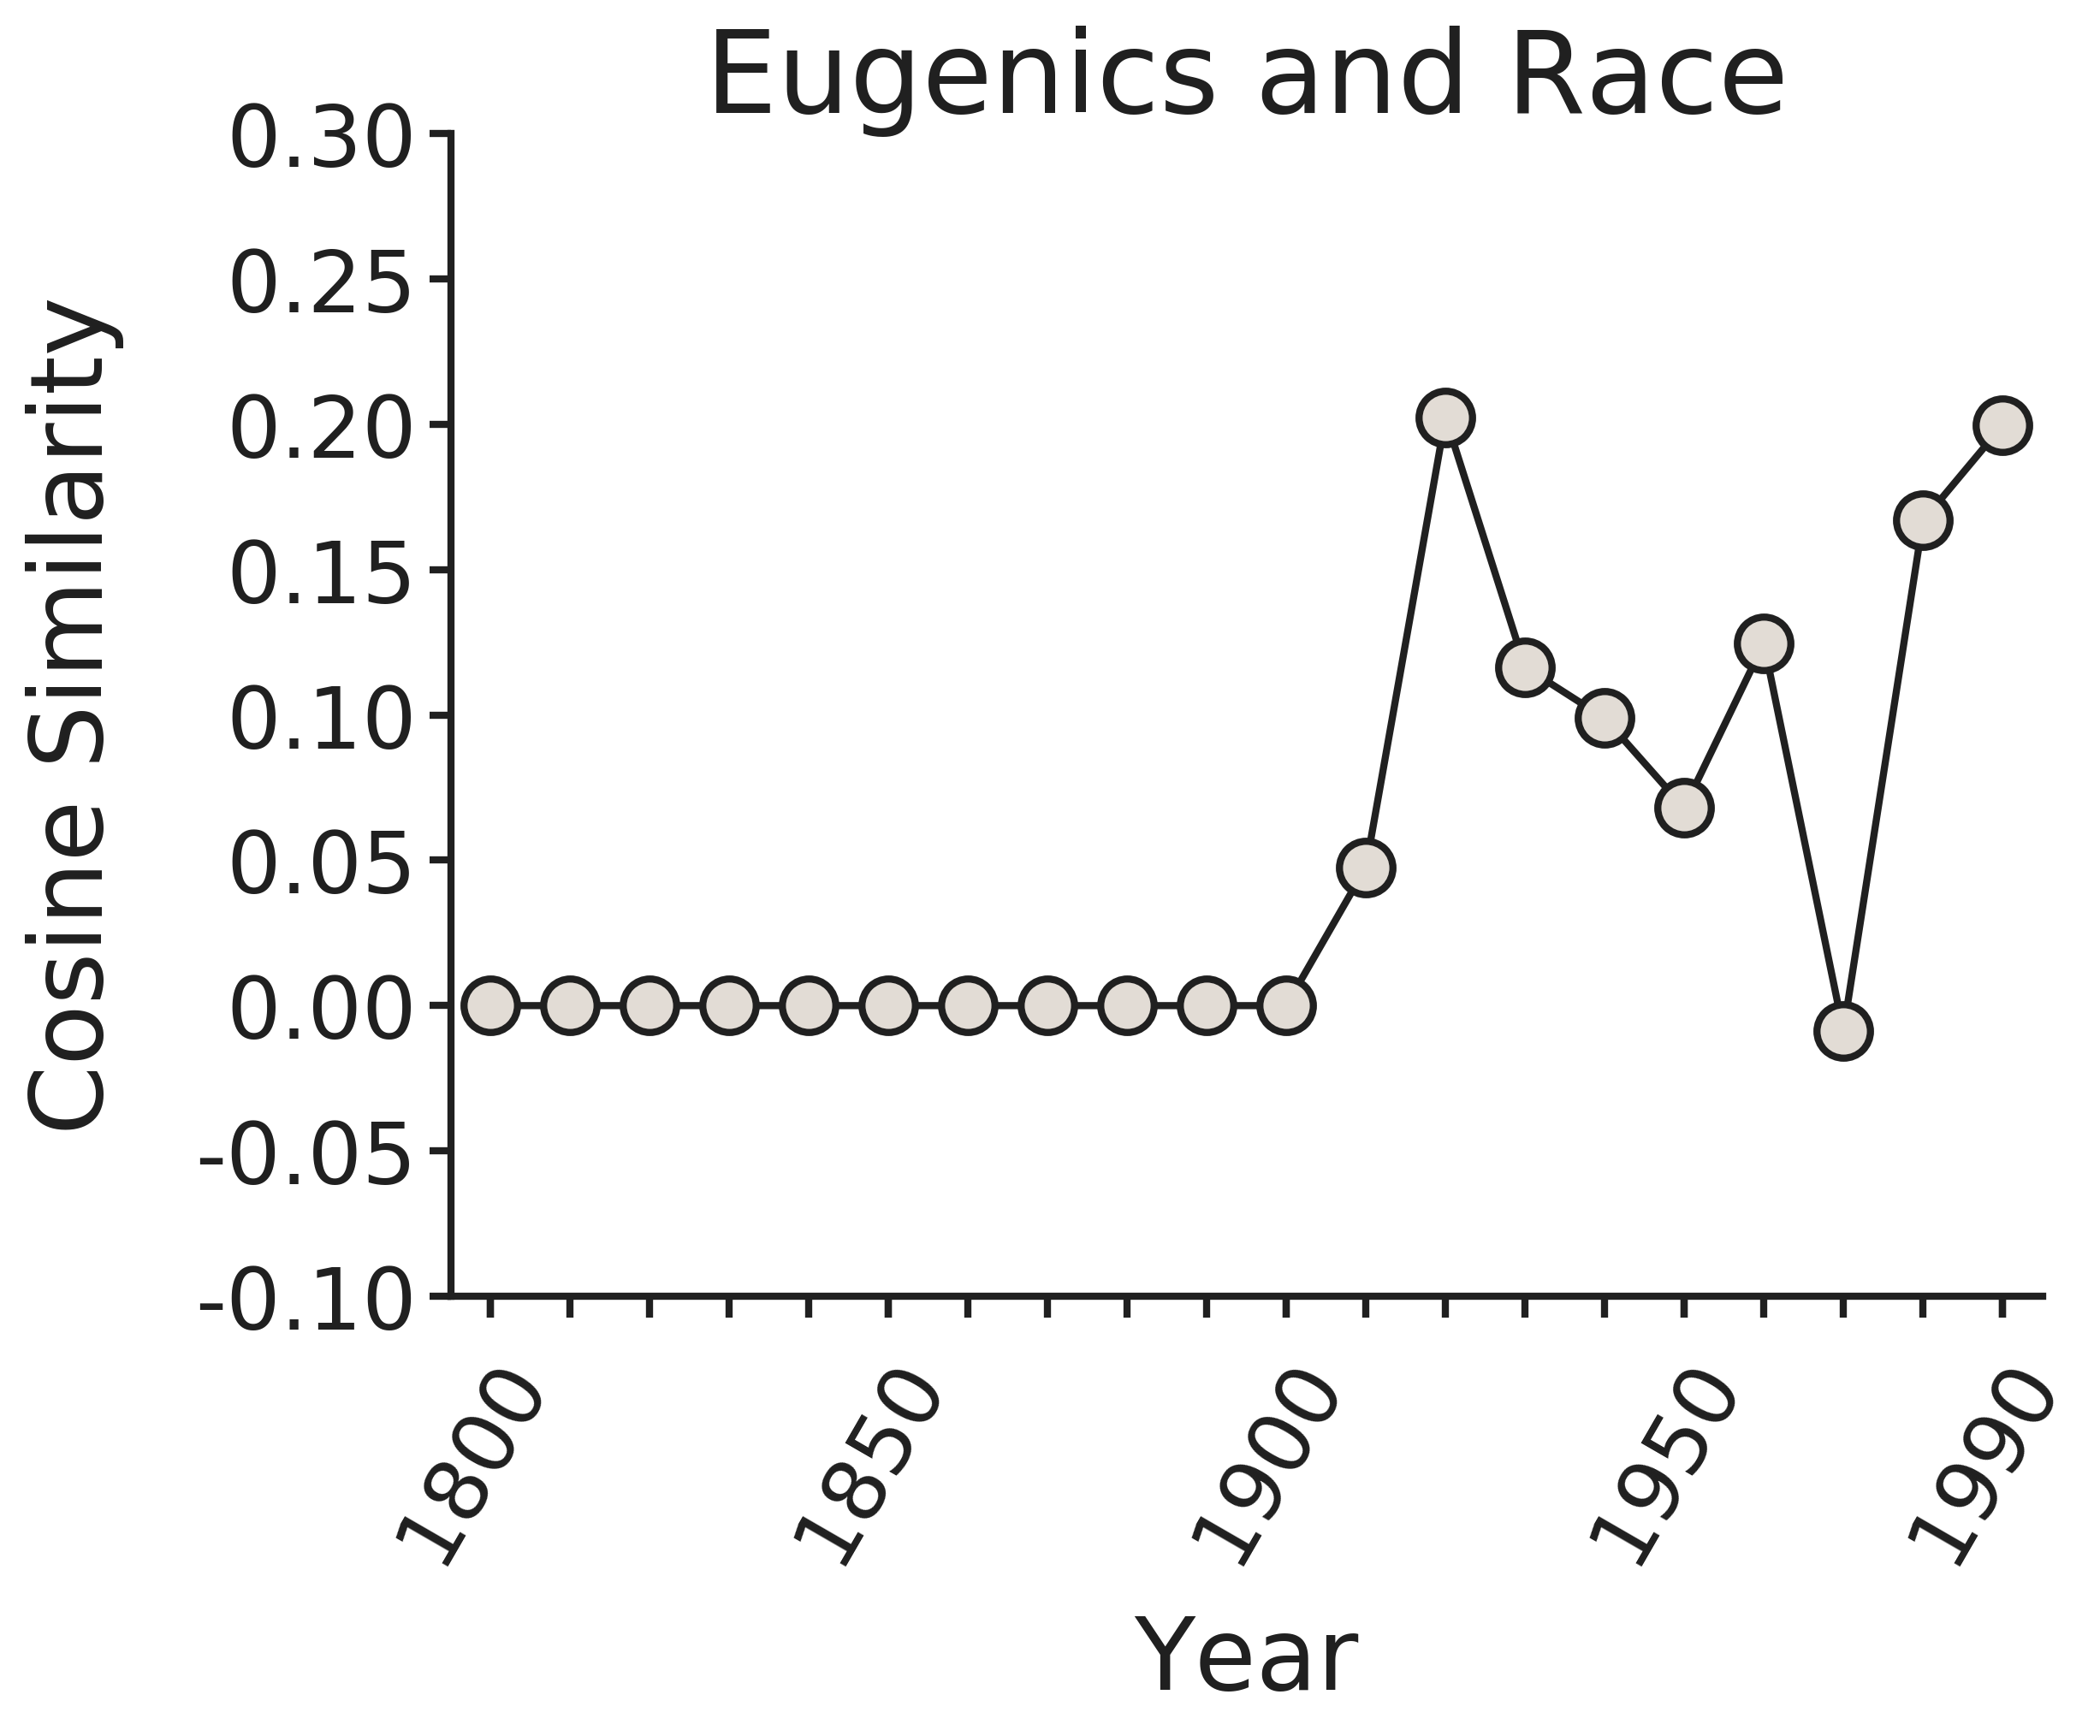

B Visualization algorithm
To visualize semantic change for a word w in two dimensions we employed the following procedure, which relies on the t-SNE embedding method (Van der Maaten and Hinton, 2008) as a subrou- tine:
1. Find the union of the word w ’s k nearest i
neighbors over all necessary time-points.
2. Compute the t-SNE embedding of these words on the most recent (i.e., the modern) time-point.
3. For each of the previous time-points, hold
all embeddings fixed, except for the target
word’s (i.e., the embedding for w ), and optimize a new t-SNE embedding only for the target word. We found that initializing the embedding for the target word to be the cen- troid of its k′-nearest neighbors in a time- point was highly effective.
Thus, in this procedure the background words are always shown in their “modern” positions, which makes sense given that these are the current mean- ings of these words. This approximation is neces- sary, since in reality all words are moving.
